In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('test.csv')

In [43]:
similar_df = pd.read_csv('train.csv')

In [4]:
df.head(5)

,Roll no,test preparation,gender,parental level of education,lunch,Section,practical score,viva score
0,EXA32000,none,male,associate's degree,standard,Section C,74,89
1,EXA32001,completed,male,some high school,standard,Section E,66,75
2,EXA32002,none,male,some high school,standard,Section C,52,55
3,EXA32003,completed,male,some high school,standard,Section D,69,85
4,EXA32004,none,female,bachelor's degree,standard,Section E,46,62


In [5]:
df.sample(5)

,Roll no,test preparation,gender,parental level of education,lunch,Section,practical score,viva score
17,EXA32017,completed,female,high school,standard,Section A,62,73
96,EXA32096,completed,male,associate's degree,free/reduced,Section B,70,58
67,EXA32067,completed,male,some college,standard,Section C,67,70
87,EXA32087,completed,female,some high school,free/reduced,Section B,70,71
26,EXA32026,none,female,associate's degree,standard,Section E,75,72


In [44]:
similar_df.head(5)

,Roll no,test preparation,gender,parental level of education,lunch,Section,practical score,viva score,exam score
0,EXA000001,none,male,some college,standard,Section A,70,73,70
1,EXA000002,none,male,master's degree,free/reduced,Section C,55,54,52
2,EXA000003,none,male,master's degree,free/reduced,Section E,56,46,43
3,EXA000004,none,female,some college,free/reduced,Section C,35,47,41
4,EXA000005,none,female,high school,standard,Section C,87,92,81


In [6]:
df.shape

(100, 8)

In [53]:
similar_df.shape

(31999, 9)

In [54]:
similar_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31999 entries, 0 to 31998
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Roll no                      31999 non-null  object
 1   test preparation             31999 non-null  object
 2   gender                       31999 non-null  object
 3   parental level of education  31999 non-null  object
 4   lunch                        31999 non-null  object
 5   Section                      31999 non-null  object
 6   practical score              31999 non-null  int64 
 7   viva score                   31999 non-null  int64 
 8   exam score                   31999 non-null  int64 
dtypes: int64(3), object(6)
memory usage: 2.2+ MB


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Roll no                      100 non-null    object
 1   test preparation             100 non-null    object
 2   gender                       100 non-null    object
 3   parental level of education  100 non-null    object
 4   lunch                        100 non-null    object
 5   Section                      100 non-null    object
 6   practical score              100 non-null    int64 
 7   viva score                   100 non-null    int64 
dtypes: int64(2), object(6)
memory usage: 6.4+ KB


In [8]:
df.isnull().sum()

Roll no                        0
test preparation               0
gender                         0
parental level of education    0
lunch                          0
Section                        0
practical score                0
viva score                     0
dtype: int64

In [9]:
df.describe()

,practical score,viva score
count,100.000000,100.000000
mean,65.190000,68.950000
std,15.530807,14.643491
min,20.000000,38.000000
25%,54.750000,59.000000
50%,65.500000,68.000000
75%,76.250000,77.000000
max,100.000000,100.000000


In [10]:
df.duplicated().sum()

0

In [ ]:
df['Roll no'] = df['Roll no'].astype(float)

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [15]:
df['practical score'].fillna(df['practical score'].mean(), inplace=True)
df['viva score'].fillna(df['viva score'].mean(), inplace=True)

In [35]:
new_data = df[['practical score','viva score']]

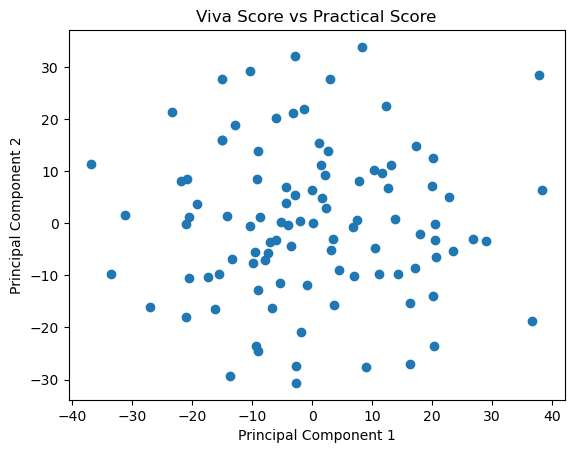

In [42]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_data = pca.fit_transform(df[['viva score', 'practical score']])

plt.scatter(pca_data[:, 0], pca_data[:, 1])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Viva Score vs Practical Score')
plt.show()

In [94]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(similar_df[['viva score', 'practical score']], similar_df['exam score'])

predicted_exam_scores = model.predict(df[['viva score', 'practical score']])

In [95]:
print(predicted_exam_scores)

[69.71875462 69.22695097 68.48128683 69.53275804 68.55962616 68.97769349
 69.69444813 69.2562689  68.85620516 69.24622397 69.49296471 69.1557314
 69.52647721 69.57087355 69.31408788 69.43850138 68.99236348 69.10881831
 68.49972091 69.42299248 68.43981567 68.66059414 69.93282177 68.16416544
 69.25710781 69.74179171 69.30109572 69.1653679  69.42802597 69.84944896
 69.17291813 68.61910092 68.9211439  69.57674596 69.2286288  68.72215517
 68.68152292 68.55919568 68.85452733 68.73682516 69.36560398 69.04471849
 69.01707839 69.71959354 69.1222189  68.699957   68.33256685 68.28900942
 69.2897814  69.47956412 69.71499053 69.84904053 69.15321465 68.87967274
 68.94209473 68.8733919  69.49464254 68.83065133 68.9500534  69.13101648
 69.29313706 68.79924715 68.34807575 69.57967113 68.78457716 69.71875462
 69.2369959  69.11593806 68.13149185 68.70499049 69.05687173 67.82108178
 68.60737816 69.14945056 68.88679249 69.06399148 68.37823259 68.38954692
 70.02372278 68.92574691 68.71839108 69.29481489 69.

In [117]:
df_with_predicted_scores = df.assign(predicted_exam_score=predicted_exam_scores)

print(df_with_predicted_scores.head())

    Roll no test preparation   gender parental level of education     lunch  \
0  EXA32000              none    male          associate's degree  standard   
1  EXA32001         completed    male            some high school  standard   
2  EXA32002              none    male            some high school  standard   
3  EXA32003         completed    male            some high school  standard   
4  EXA32004              none  female           bachelor's degree  standard   

     Section  practical score  viva score  exam_score  predicted_exam_score  
0  Section C               74          89           0             69.718755  
1  Section E               66          75           0             69.226951  
2  Section C               52          55           0             68.481287  
3  Section D               69          85           0             69.532758  
4  Section E               46          62           0             68.559626  


In [126]:
df_with_predicted_scores.drop('exam_score', axis=1, inplace=True)

In [127]:
df_with_predicted_scores.columns

Index(['Roll no', 'test preparation ', 'gender', 'parental level of education',
       'lunch', 'Section', 'practical score', 'viva score',
       'predicted_exam_score'],
      dtype='object')

In [128]:
df_with_predicted_scores.sample()

,Roll no,test preparation,gender,parental level of education,lunch,Section,practical score,viva score,predicted_exam_score
66,EXA32066,completed,male,associate's degree,standard,Section A,91,59,69


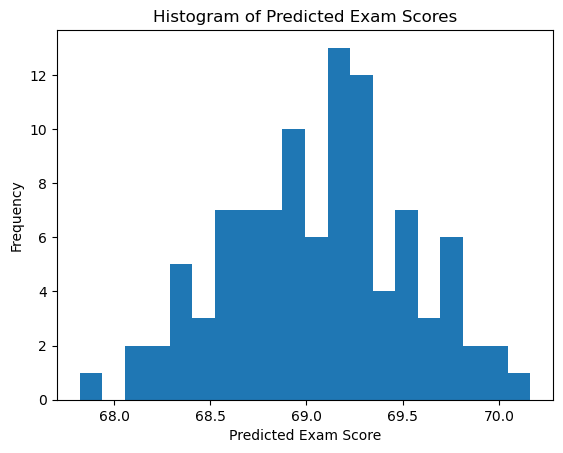

In [97]:
plt.hist(predicted_exam_scores, bins=20)
plt.xlabel('Predicted Exam Score')
plt.ylabel('Frequency')
plt.title('Histogram of Predicted Exam Scores')
plt.show()

In [118]:
df_with_predicted_scores['predicted_exam_score'] = df_with_predicted_scores['predicted_exam_score'].round()

In [119]:
print(df_with_predicted_scores['predicted_exam_score'])

0     70.0
1     69.0
2     68.0
3     70.0
4     69.0
      ... 
95    70.0
96    69.0
97    69.0
98    69.0
99    69.0
Name: predicted_exam_score, Length: 100, dtype: float64


In [120]:
df_with_predicted_scores['predicted_exam_score'] = df_with_predicted_scores['predicted_exam_score'].astype(int)

In [121]:
print(df_with_predicted_scores['predicted_exam_score'].dtype)

int32


In [129]:
df_with_predicted_scores.head(5)

,Roll no,test preparation,gender,parental level of education,lunch,Section,practical score,viva score,predicted_exam_score
0,EXA32000,none,male,associate's degree,standard,Section C,74,89,70
1,EXA32001,completed,male,some high school,standard,Section E,66,75,69
2,EXA32002,none,male,some high school,standard,Section C,52,55,68
3,EXA32003,completed,male,some high school,standard,Section D,69,85,70
4,EXA32004,none,female,bachelor's degree,standard,Section E,46,62,69


C:\Users\pc\anaconda3\New folder\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\pc\anaconda3\New folder\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


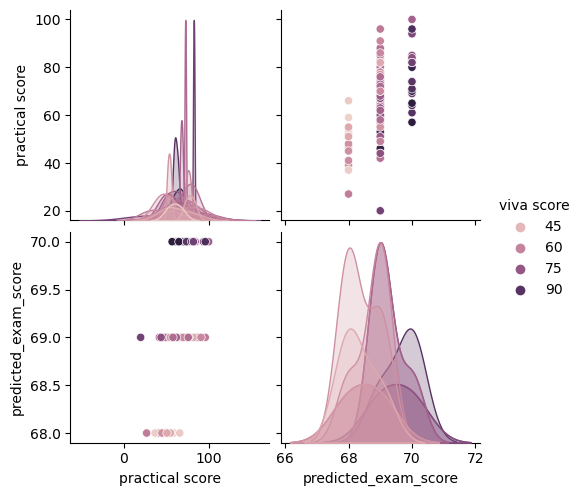

In [130]:
sns.pairplot(df_with_predicted_scores, hue= 'viva score')


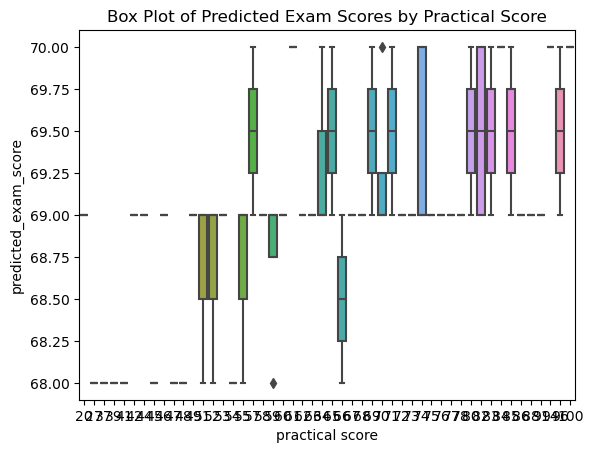

In [132]:
sns.boxplot(x='practical score', y='predicted_exam_score', data=df_with_predicted_scores)
plt.title('Box Plot of Predicted Exam Scores by Practical Score')
plt.show()